In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [40]:
author_stat_path = '../data/pdata/author_stat@1.1.csv'
commit_stat_path = '../data/pdata/commit_stat@0.csv'

In [41]:
commit = pd.read_csv(commit_stat_path,index_col=['bug'])
author = pd.read_csv(author_stat_path,index_col=['author'])

In [42]:
print(commit.info())
print(author.info())

<class 'pandas.core.frame.DataFrame'>
Index: 492 entries, 95f0b77ef to 76f0c53d08b9
Data columns (total 11 columns):
fix                  492 non-null object
fix_distance         492 non-null float64
find_bug_time        492 non-null float64
fix_bug_time         492 non-null float64
nloc                 492 non-null float64
CCN                  492 non-null float64
function_numbers     492 non-null float64
token_count          492 non-null float64
parameter_count      492 non-null float64
find_bug_time_day    492 non-null float64
fix_bug_time_day     492 non-null float64
dtypes: float64(10), object(1)
memory usage: 46.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 3391 entries, Zhuoyu Zhang to Mark Brown
Data columns (total 13 columns):
commits_number               3391 non-null int64
bug_commits_number           3391 non-null int64
total_fix_distance           3391 non-null float64
total_find_bug_time          3391 non-null float64
total_fix_bug_time           3391 non-null f

# 1. Linear Regression


## 1. 1 Hypothesis 1:
####     

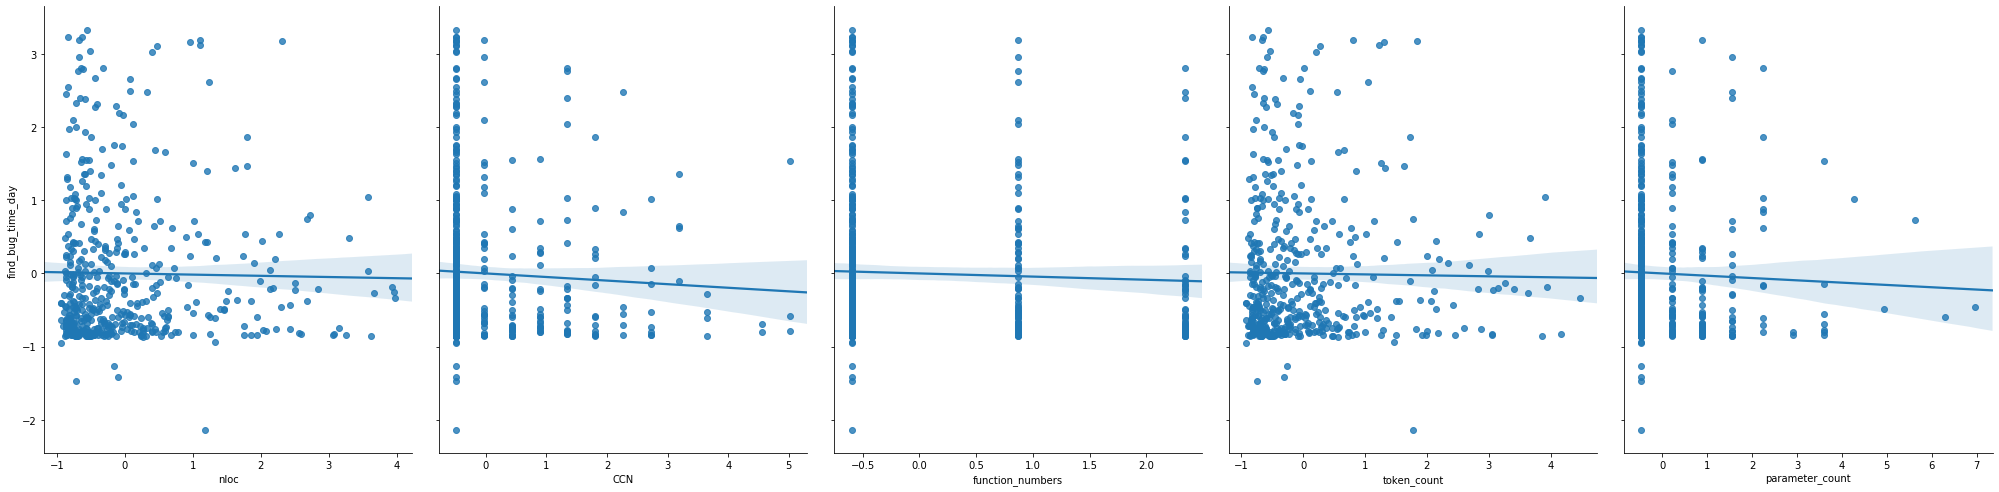

In [35]:
sns.pairplot(commit, x_vars=['nloc','CCN','function_numbers','token_count','parameter_count'], y_vars='find_bug_time_day',height=7, aspect=0.8,kind = 'reg')

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(commit[['nloc','CCN','function_numbers','token_count','parameter_count']],commit['find_bug_time_day'],train_size=.80)
model = LinearRegression()
model.fit(X_train,Y_train)
print(model.intercept_)
print(model.coef_)

0.024155112839013077
[-0.05758192 -0.01380273 -0.03816151  0.02855577  0.01390873]


In [37]:
score = model.score(X_test,Y_test)
print(score)

-0.015946464961757556


## 1.2 Hypothesis 2:
####     The more complex the code is, the harder it is to fix its bug(s).

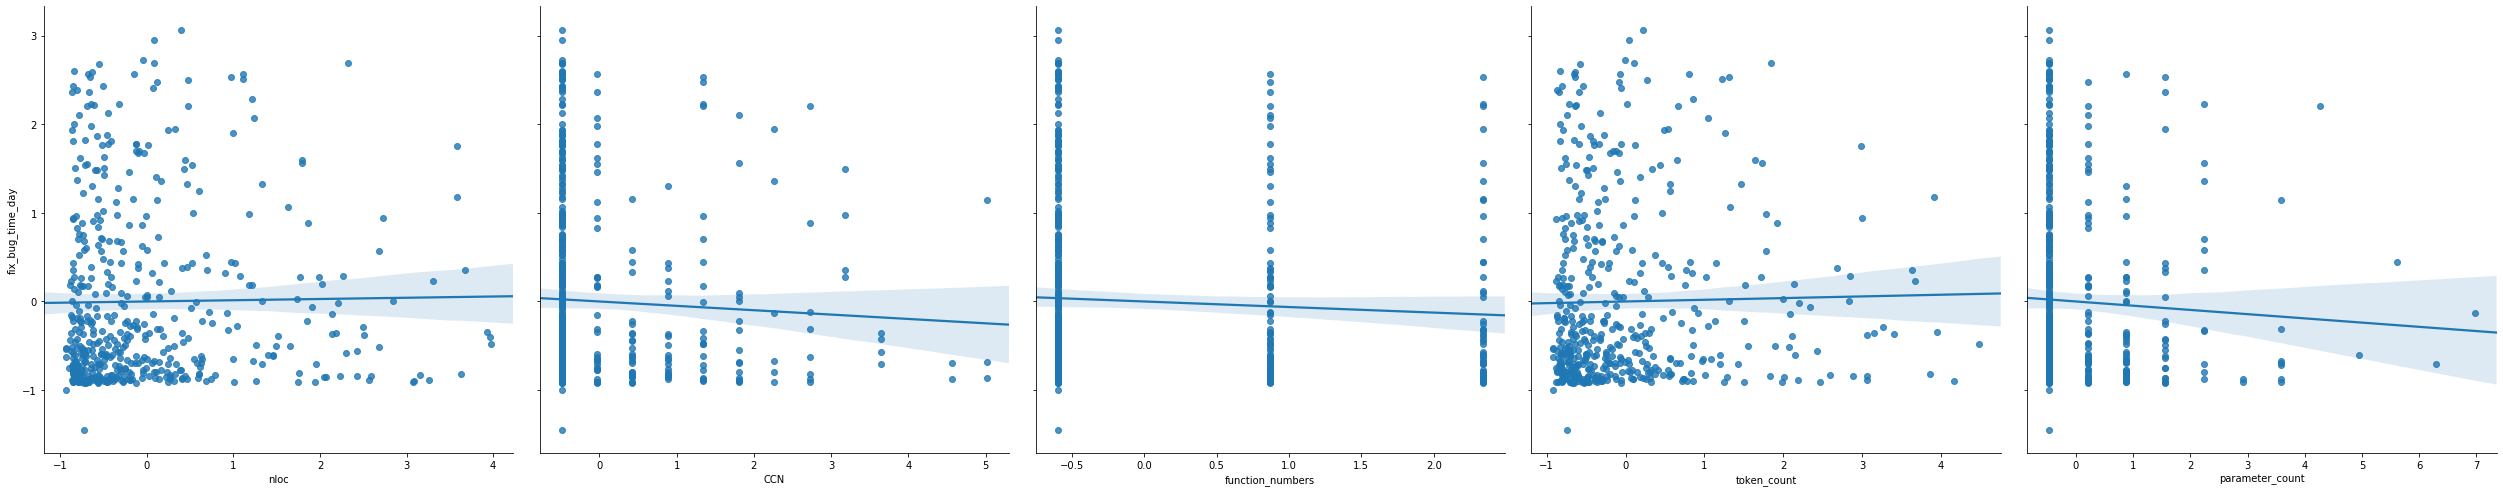

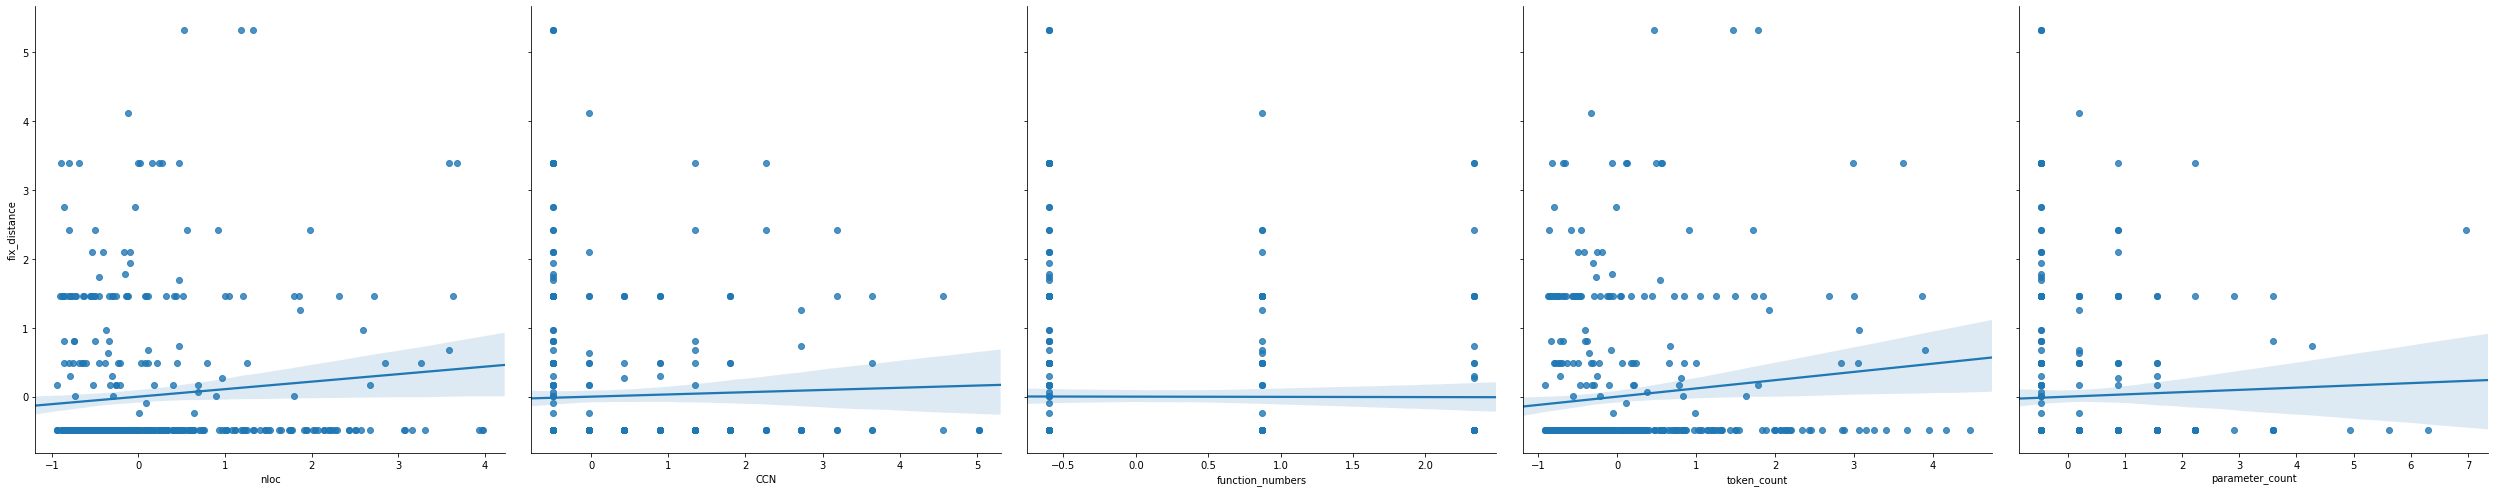

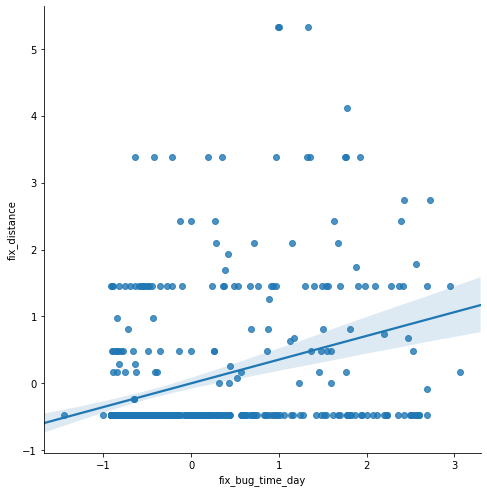

In [43]:
sns.pairplot(commit, x_vars=['nloc','CCN','function_numbers','token_count','parameter_count'], y_vars='fix_bug_time_day',height=7, kind = 'reg')
sns.pairplot(commit, x_vars=['nloc','CCN','function_numbers','token_count','parameter_count'], y_vars='fix_distance',height=7,kind = 'reg')
sns.pairplot(commit, x_vars=['fix_bug_time_day'], y_vars='fix_distance',height=7, kind = 'reg')